In [5]:
#!pip install monai pytorch-gpu nilearn
#from google.colab import drive
#drive.mount('/content/drive')

import numpy as np
from matplotlib.pyplot import plot
from matplotlib.pyplot import show

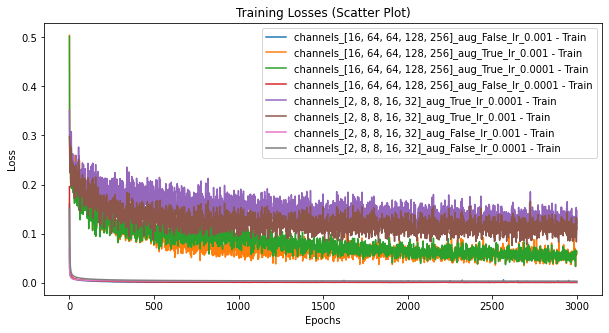

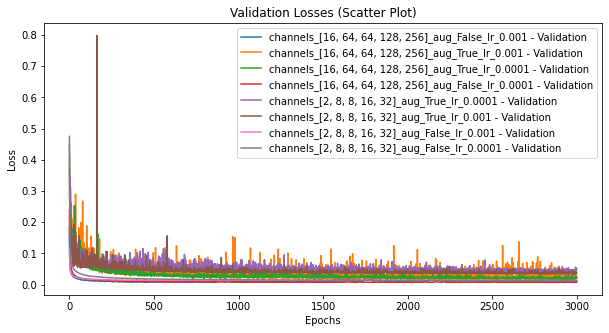

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Your main directory path
main_directory = '/project/ajoshi_27/code_farm/rodbfc/models'

epoch_number = 3000

# Function to extract train and validation losses from a file
def extract_losses(loss_file):
    data = np.load(loss_file)
    return data['train_loss_epoch'], data['val_loss_epoch']

# Lists to store train and validation losses
all_train_losses = []
all_val_losses = []

# Labels for legends
labels = []

# Iterate through subdirectories
for subdir in os.listdir(main_directory):
    subdir_path = os.path.join(main_directory, subdir)

    # Check if it's a directory
    if os.path.isdir(subdir_path):
        # Look for the loss file in the subdirectory
        loss_files = [file for file in os.listdir(subdir_path) if file.startswith('bias_field_correction_loss_') and file.endswith(f'{epoch_number}.npz')]
        if loss_files:
            loss_file_name = os.path.join(subdir_path, loss_files[0])

            # Extract train and validation losses
            train_loss, val_loss = extract_losses(loss_file_name)
            train_loss = train_loss[0:3000]
            val_loss = val_loss[0:3000]

            # Append to the lists
            all_train_losses.append((range(len(train_loss)), train_loss, subdir))
            all_val_losses.append((range(len(val_loss)), val_loss, subdir))

# Scatter plot for training losses
plt.figure(figsize=(10, 5))
for data in all_train_losses:
    epochs, train_loss, label = data
    plt.plot(epochs, train_loss, label=f'{label} - Train')

plt.title('Training Losses (Scatter Plot)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  # Add legend for training losses
plt.show()

# Scatter plot for validation losses
plt.figure(figsize=(10, 5))
for data in all_val_losses:
    epochs, val_loss, label = data
    plt.plot(epochs, val_loss, label=f'{label} - Validation')

plt.title('Validation Losses (Scatter Plot)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  # Add legend for validation losses
plt.show()






In [ ]:
import os

test_image_path = 'sub-002_ses-1_acq-RARE_T2w.nii.gz'
#test_ground_truth_corrected_image_path = 'sub-002_ses-1_acq-RARE_T2w.bfc_new.nii.gz'#3_RC_corr.nii.gz'
test_corrected_image_path = 'sub-002_ses-1_acq-RARE_T2w.ml.bfc.nii.gz'
bias_file = 'sub-002_ses-1_acq-RARE_T2w.bias.nii.gz'#3_RC.bias.nii.gz'
#model_file='models/bias_field_correction_model_2023-09-17_02-55-00.pth'
#model_file='models/bias_field_correction_model_2023-12-30_07-51-08_epoch_20000.pth'
model_file='models/bias_field_correction_model_2024-01-01_19-25-58_epoch_9500.pth'

cmd = 'rm '+ test_corrected_image_path

os.system(cmd)
cmd = '/project/ajoshi_27/code_farm/rodbfc/rodbfc.py -i '+test_image_path + ' -m ' + model_file + ' -o ' + test_corrected_image_path + ' -b ' + bias_file
os.system(cmd)
print('done')


rm: cannot remove 'sub-002_ses-1_acq-RARE_T2w.ml.bfc.nii.gz': No such file or directory


metatensor(0.8034, device='cuda:0') metatensor(0.0007, device='cuda:0')
done


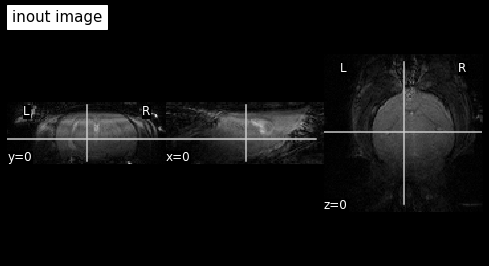

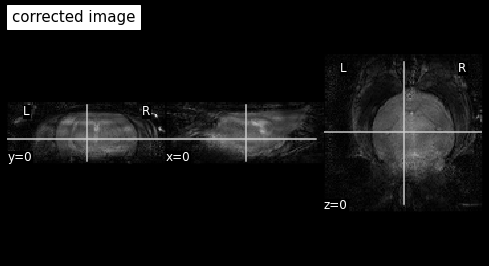

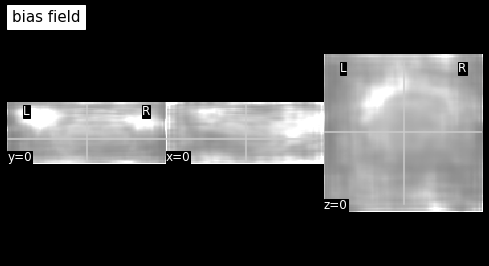

In [ ]:
from nilearn.plotting import plot_anat

plot_anat(test_image_path,title='inout image',vmin=0,vmax=15000,cut_coords=(0,0,0))
plot_anat(test_corrected_image_path,title='corrected image',vmin=0,vmax=15000,cut_coords=(0,0,0))
#plot_anat(test_ground_truth_corrected_image_path,title='ground truth image',vmin=0,vmax=15000,cut_coords=(0,0,0))
plot_anat(bias_file,title='bias field', vmin=-2,vmax=2,cut_coords=(0,0,0))